In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as animation
import seaborn as sns

sns.set(font_scale=1.6, palette='RdBu')

## Продвинутые методы оптимизации

Вы уже познакомились с основными методами оптимизации, которые широко используются в классическом машинном обучении. С развитием нейронных сетей и активным внедрением нейросетевого подхода, методы оптимизации стали ещё более актуальными. Но стандартные методы оптимизации, SGD и метод тяжёлого шара, имеют ряд недостатков, из-за чего их редко применяют в чистом виде. Для обучения современных нейросетей используют более продвинутые методы. 

Ключевая особенность всех рассматриваемых ниже методов в том, что они являются адаптивными. Т.е. для различных параметров оптимизируемой функции обновление происходит с различной скоростью.

Пусть задача оптимизации имеет вид $Q(x) \to \min_x$, и $\nabla_{x} Q(x)$ - градиент функции $Q(x)$.

**1. Adagrad**

Adagrad -- один из самых первых адаптивных методов оптимизации. Во всех изученных ранее методах есть необходимость подбирать шаг метода (коэффициент $\eta$). На каждой итерации все компоненты градиента оптимизируемой функции домножаются на одно и то же число $\eta$. Но использовать одно значение $\eta$ для всех параметров не оптимально, так как они имеют различные распределения и оптимизируемая функция изменяется с совершенно разной скоростью при небольших изменениях разных параметров. Поэтому гораздо логичнее изменять значение каждого параметра с индивидуальной скоростью. При этом, чем в большей степени от изменения параметра меняется значение оптимизируемой функции, тем с меньшей скоростью стоить обновлять этот параметр. Иначе высок шанс расходимости метода.

Пусть $x^{(i)}$ - $i$-я компонента вектора $x$.
$$g_{t} = g_{t-1} + \nabla Q(x_t) \odot \nabla Q(x_t)$$
$$x_{t+1, i} = x_{t, i} - \frac{\eta}{\sqrt{g_{t, i}+\varepsilon}}\cdot \nabla Q_i(x_t)$$
В матрично-векторном виде шаг алгоритма можно переписать так:
$$x_{t+1} = x_{t} - \frac{\eta}{\sqrt{g_{t} + \varepsilon}}\odot \nabla Q(x_t).$$
Здесь $\odot$ обозначает произведение Адамара, т.е. поэлементное перемножение векторов.

**2. RMSProp**

Алгоритм RMSProp основан на той же идее, что и алгоритм Adagrad - адаптировать learning rate отдельно для каждого параметра $\theta^{(i)}$.  Однако Adagrad имеет серьёзный недостаток. Он с одинаковым весом учитывает значение квадраты градиентов как с самых первых итераций, так и с самых последних. Хотя, на самом деле, наибольшую значимость имеет модули градиентов на последних нескольких итерациях. Для этого предлагается использовать экспоненциальное сглаживание.
$$g_t = \mu g_{t-1} + (1-\mu) \nabla Q(x_t) \odot \nabla Q(x_t)$$
$$x_{t+1} = x_{t} - \frac{\eta}{\sqrt{g_{t} + \varepsilon}}\odot \nabla Q(x_t).$$

Стандартные значения гиперпараметров: $\gamma = 0.9, \eta = 0.001$.

**3. Adadelta**

Этот метод по формуле шага и по смыслу очень похож на RMSProp. Авторы метода заметили, что в различных методах 1 порядка для оптимальной сходимости нужно брать совершенно разные значения learning rate ($\eta$), а иногда - подбирать значение $\eta$ в зависимости от решаемой задачи. Чтобы избавиться от необходимости находить наилучшее значение $\eta$. Для этого корень среднеквадратичной ошибки обновления параметра (RMS) считается теперь и для $\Delta \theta$.
$$d_t = \mu d_{t-1} + (1-\mu)\Delta x_t \odot \Delta x_t$$
$$\Delta x_{t} = -\frac{\sqrt{d_{t-1}+\varepsilon}}{\sqrt{g_{t} + \varepsilon}}\odot \nabla Q(x_t)$$
$$x_{t+1} = x_t + \Delta x_t$$

Преимущество данного метода по сравнению с RMSProp - отсутствие необходимости подбирать значения параметра $\eta$.
Экспериментальным путём выяснено, что для Adadelta наилучшее значение $\gamma \sim 0.9$.

**4. Adam**

Этот алгоритм совмещает в себе 2 идеи: идею алгоритма Momentum о накапливании градиента, идею методов Adadelta и RMSProp об экспоненциальном сглаживании информации о предыдущих значениях квадратов градиентов.

Благодаря использованию этих двух идей, метод имеет 2 преимущества на д большей частью методов первого порядка, описанных выше:

1) Он обновляет все параметры $\theta$ не с одинаковым learning rate, а выбирает для каждого $\theta_i$ индивидуальный learning rate, что позволяет учитывать разреженные признаки с большим весом.

2) Adam за счёт применения экспоненциального сглаживания к градиенту работает более устойчиво в окрестности оптимального значения параметра $\theta^*$, чем методы, использующие градиент в точке $x_t$, не накапливая значения градиента с прошлых шагов.

Формулы шага алгоритма выглядят так:
$$v_t = \beta v_{t-1} + (1-\beta)v_t$$
$$g_t = \mu g_{t-1} + (1-\mu) \nabla Q(x_t) \odot \nabla Q(x_t)$$

Чтобы эти оценки не были смещёнными, нужно их отнормировать:
$$\widehat{v}_t = \frac{v_t}{1-\beta^t},$$
$$\widehat{g}_t = \frac{g_t}{1-\mu^t}.$$

Тогда получим итоговую формулу шага:

$$x_{t+1} = x_t - \frac{\eta}{\sqrt{\widehat{g}_t} + \varepsilon}\widehat{v}_t.$$


$ $

**Статьи.**

Для того, чтобы подробнее познакомиться с представленными выше методами, мотивацией их авторов и теоретическими оценками сходимости, можно прочитать оригинальные статьи.

Adagrad -- http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf,

Adadelta -- https://arxiv.org/abs/1212.5701,

Adam -- https://arxiv.org/abs/1412.6980.

Как можно заметить, для нейросетей мы рассматриваем только методы оптимизации первого порядка. Это связано с тем, что эффективные архитектуры нейронных сетей имеют большое количество параметров, из-за чего методы второго порядка, требующие на одну итерацию $O(d^2)$ памяти и выполняющие $O(d^3)$ операций, работают слишком долго и их преимущество в количестве итераций до сходимости утрачивает смысл. 

### Эксперименты.

Нет универсального метода оптимизации, который всегда работает лучше, чем остальные. Поэтому для выбора наилучшего метода оптимизации и оптимальных гиперпараметров для него проводят ряд экспериментов.
Ниже приведена визуализация нескольких экспериментов и сравнение скорости сходимости различных методов оптимизации, запущенных из одной точки.


Реализуем методы оптимизации.

In [2]:
def adagrad(theta0, func_grad, eps=1e-6, eta=0.01, iter_count=150):
    '''
    Adagrad.
    
    Параметры.
    1) theta0 - начальное приближение theta,
    2) func_grad - функция, задающая градиент оптимизируемой функции,
    3) eps - мин. возможное значение знаменателя,
    4) eta - скорость обучения,
    5) iter_count - количество итераций метода.
    '''
    
    theta = theta0
    history = [theta0]
    cumulative_grad = np.zeros(theta0.shape)
    
    for iter_id in range(iter_count):
        current_grad = func_grad(theta)
        cumulative_grad += current_grad**2
        theta = theta - eta * current_grad / np.sqrt(cumulative_grad + eps)
        history.append(theta)
        
    return history


def rmsprop(theta0, func_grad, eps=1e-6, eta=0.01, mu=0.9, iter_count=150):
    '''
    RMSProp.
    
    Параметры.
    1) theta0 - начальное приближение theta,
    2) func_grad - функция, задающая градиент оптимизируемой функции,
    3) eps - мин. возможное значение знаменателя,
    4) eta - скорость обучения,
    5) mu - параметр экспоненциального сглаживания,
    6) iter_count - количество итераций метода.
    '''
    
    theta = theta0
    history = [theta0]
    cumulative_grad = np.zeros(theta0.shape)
    
    for iter_id in range(iter_count):
        current_grad = func_grad(theta)
        cumulative_grad = mu * cumulative_grad + (1-mu) * current_grad**2
        theta = theta - eta * current_grad / np.sqrt(cumulative_grad + eps)
        history.append(theta)
        
    return history

def adadelta(theta0, func_grad, eps=1e-6, mu=0.9, iter_count=150):
    '''
    Adadelta.
    
    Параметры.
    1) theta0 - начальное приближение theta,
    2) func_grad - функция, задающая градиент оптимизируемой функции,
    3) eps - мин. возможное значение знаменателя,
    4) mu - параметр экспоненциального сглаживания,
    5) iter_count - количество итераций метода.
    '''
    
    theta = theta0.astype(float)
    history = [theta0]
    cumulative_grad = np.zeros(theta0.shape)
    cumulative_delta = np.zeros(theta0.shape)
    
    for iter_id in range(iter_count):
        current_grad = func_grad(theta)
        cumulative_grad = mu * cumulative_grad + (1-mu) * current_grad**2
        delta_theta = current_grad / np.sqrt(cumulative_grad + eps)
        delta_theta *= -np.sqrt(cumulative_delta + eps)
        theta += delta_theta 
        cumulative_delta = mu * cumulative_delta + (1-mu) * delta_theta**2
        history.append(theta)
        
    return history

def adam(theta0, func_grad, eps=1e-6, eta=0.01, beta=0.9, mu=0.95, iter_count=150):
    '''
    Adam.
    
    Параметры.
    1) theta0 - начальное приближение theta,
    2) func_grad - функция, задающая градиент оптимизируемой функции,
    3) eps - мин. возможное значение знаменателя,
    4) eta - скорость обучения,
    5) beta - параметр экспоненциального сглаживания,
    6) mu - параметр экспоненциального сглаживания,
    7) iter_count - количество итераций метода.
    '''
    
    theta = theta0
    history = [theta0]
    cumulative_m = np.zeros(theta0.shape)
    cumulative_v = np.zeros(theta0.shape)
    pow_beta, pow_mu = beta, mu
    
    for iter_id in range(iter_count):
        current_grad = func_grad(theta)
        cumulative_m = beta * cumulative_m + (1 - beta) * current_grad
        cumulative_v = mu * cumulative_v + (1 - mu) * current_grad**2
        
        scaled_m = cumulative_m / (1 - pow_beta)
        scaled_v = cumulative_v / (1 - pow_mu)
        theta = theta - eta * cumulative_m / (np.sqrt(cumulative_v) + eps)
        history.append(theta)
        
        pow_beta *= beta
        pow_mu *= mu
        
    return history

Реализуем функции, которые будем оптимизировать.

In [3]:
def square_sum(x):
    ''' f(x, y) = x^2 + y^2 '''
    
    return 5 * x[0]**2 + x[1]**2

def square_sum_grad(x):
    ''' grad f(x, y) = (10x, 2y) '''
    
    return np.array([10, 2]) * x


def complex_sum(x):
    ''' f(x, y) = (x-3)^2 + 8(y-5)^4 + sqrt(x) + sin(xy)'''
    
    return (x[0]-3)**2 + 8 * (x[1]-5)**4 + x[0]**0.5 + np.sin(x[0]*x[1])

def complex_sum_grad(x):
    ''' grad f(x, y) = (2(x-3) + 1/(2 sqrt(x)) + ycos(xy), 32(y-5)^3 + xcos(xy)) '''
    
    partial_x = 2*(x[0]-3) + 0.5*x[0]**(-0.5) + x[1]*np.cos(x[0]*x[1])
    partial_y = 32*(x[1]-5)**3 + x[0]*np.cos(x[0]*x[1])
                                                                   
    return np.array([partial_x, partial_y])

Создадим директорию, в которой будем хранить визуализацию экспериментов.

In [4]:
!rm -rf saved_gifs
!mkdir saved_gifs

In [5]:
def make_experiment(func, trajectory, graph_title,
                    min_y=-7, max_y=7, min_x=-7, max_x=7):
    '''
    Функция, которая для заданной функции рисует её линии уровня, 
    а также траекторию сходимости метода оптимизации.
    
    Параметры.
    1) func - оптимизируемая функция,
    2) trajectory - траектория метода оптимизации,
    3) graph_name - заголовок графика.
    '''
    
    fig, ax = plt.subplots(figsize=(10, 8))
    xdata, ydata = [], []
    ln, = plt.plot([], [])
    
    mesh_x = np.linspace(min_x, max_x, 300)
    mesh_y = np.linspace(min_y, max_y, 300)
    X, Y = np.meshgrid(mesh_x, mesh_y)
    Z = np.zeros((len(mesh_x), len(mesh_y)))
    
    for coord_x in range(len(mesh_x)):
        for coord_y in range(len(mesh_y)):
            Z[coord_y, coord_x] = func(
                np.array((mesh_x[coord_x], 
                          mesh_y[coord_y]))
            )
    
    def init():
        ax.contour(
            X, Y, np.log(Z), 
            np.log([0.5, 10, 30, 80, 130, 200, 300, 500, 900]), 
            cmap='winter'
        )
        ax.set_title(graph_title)
        return ln,

    def update(frame):
        xdata.append(trajectory[frame][0])
        ydata.append(trajectory[frame][1])
        ln.set_data(xdata, ydata)
        return ln,
    
    ani = animation.FuncAnimation(
        fig, update, frames=range(len(trajectory)),
        init_func=init, repeat=True
    )
    ani.save(f'saved_gifs/{graph_title}.gif', 
             writer='imagemagick', fps=5)

### Adagrad

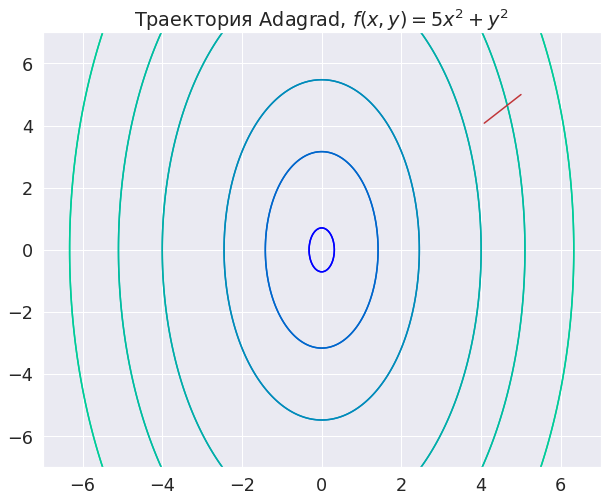

In [6]:
adagrad_trajectory = adagrad(
    np.array((5, 5)), square_sum_grad, eta=0.1, iter_count=30
)
make_experiment(
    square_sum, adagrad_trajectory, 
    'Траектория Adagrad, $f(x, y) = 5x^2 + y^2$'
)

По графику траектории можно заметить, что метод успел сделать очень небольшой шаг. Это связано с очень быстрой скоростью убывания адаптивного шага (learnnig rate). Поэтому для получения адекватных результатов с Adagrad стоит брать значение $\eta$ значительно больше чем при использовании SGD.

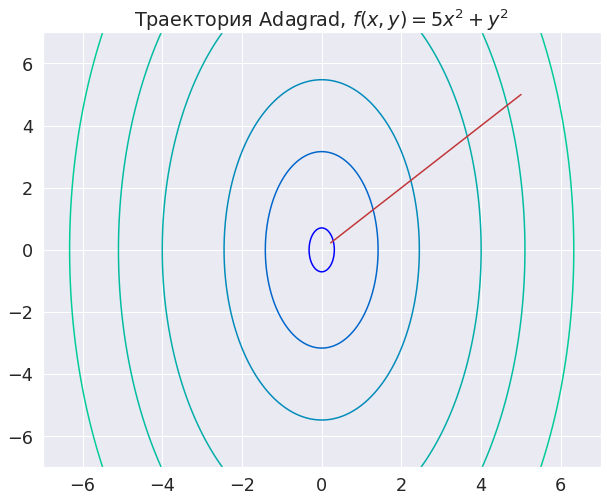

In [7]:
adagrad_trajectory = adagrad(
    np.array((5, 5)), square_sum_grad, eta=0.9, iter_count=30
)
make_experiment(
    square_sum, adagrad_trajectory,
    'Траектория Adagrad, $f(x, y) = 5x^2 + y^2$'
)

Опробуем Adagrad на другой функции.

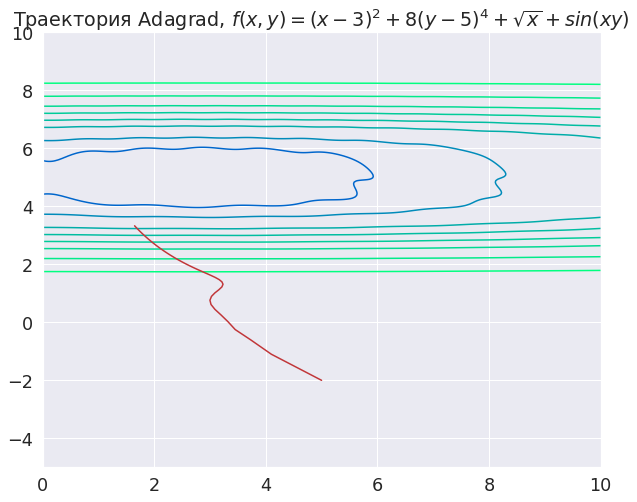

In [8]:
adagrad_trajectory = adagrad(
    np.array((5, -2)), complex_sum_grad, eta=0.9, iter_count=100
)
make_experiment(
    complex_sum, adagrad_trajectory,
    'Траектория Adagrad, $f(x, y) = (x-3)^2 + 8(y-5)^4 + \\sqrt{x} + sin(xy)$',
    -5, 10, 0, 10
)

### RMSProp

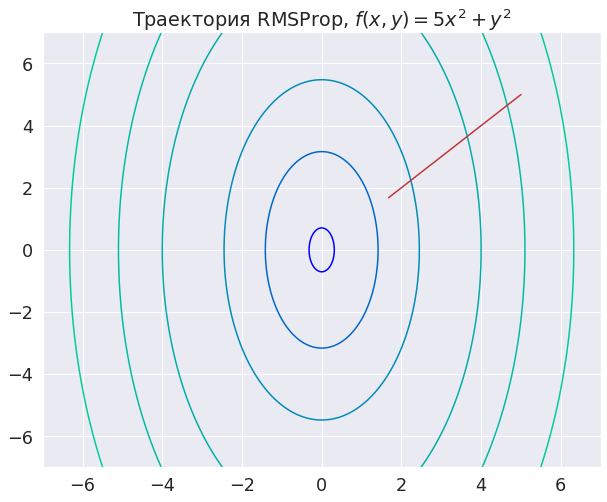

In [9]:
rmsprop_trajectory = rmsprop(
    np.array((5, 5)), square_sum_grad, eta=0.1, iter_count=30
)
make_experiment(
    square_sum, rmsprop_trajectory, 
    'Траектория RMSProp, $f(x, y) = 5x^2 + y^2$'
)

В RMSProp адаптивный шаг убывает медленнее, что делает этот метод более устойчивым.

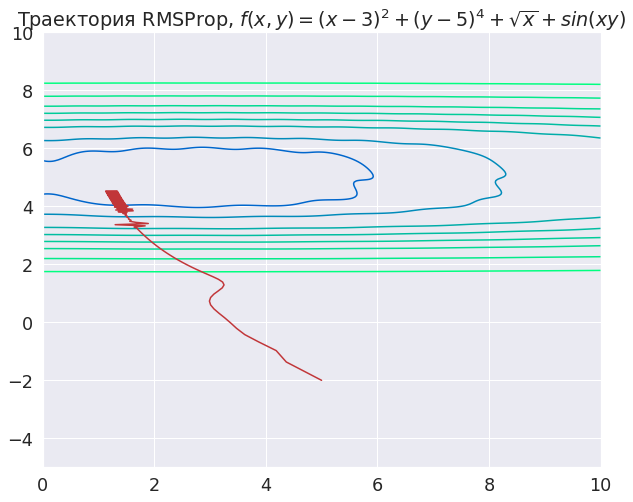

In [10]:
rmsprop_trajectory = rmsprop(np.array((5, -2)), complex_sum_grad, eta=0.2, iter_count=100)
make_experiment(
    complex_sum,  rmsprop_trajectory,
    'Траектория RMSProp, $f(x, y) = (x-3)^2 + (y-5)^4 + \\sqrt{x}+sin(xy)$',
    -5, 10, 0, 10
)

### Adadelta

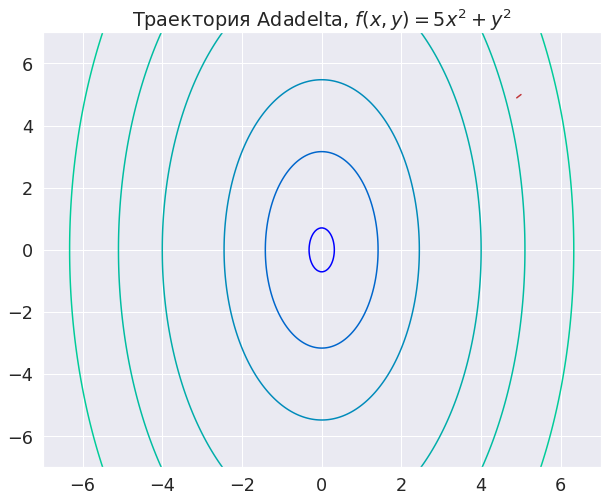

In [11]:
adadelta_trajectory = adadelta(
    np.array((5, 5)), square_sum_grad, iter_count=30
)
make_experiment(
    square_sum, adadelta_trajectory, 
    'Траектория Adadelta, $f(x, y) = 5x^2 + y^2$'
)

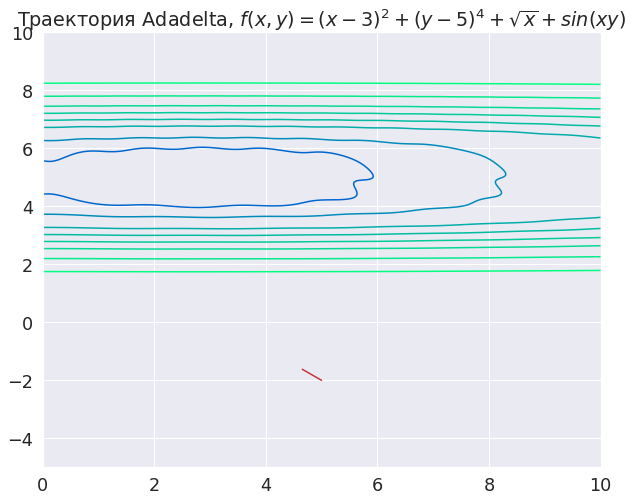

In [12]:
adadelta_trajectory = adadelta(
    np.array((5, -2)), complex_sum_grad, iter_count=100
)
make_experiment(
    complex_sum, adadelta_trajectory, 
    'Траектория Adadelta, $f(x, y) = (x-3)^2 + (y-5)^4 + \\sqrt{x}+sin(xy)$',
    -5, 10, 0, 10)

На наших оптимизируемых функциях метод Adadelta показал очень низкую скорость сходимости. Тем не менее, на многих архитектурах нейросетей он работает гораздо лучше.

### Adam

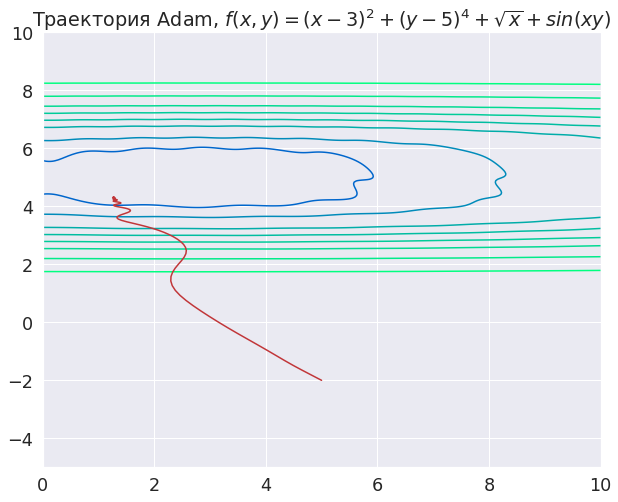

In [13]:
adam_trajectory = adam(
    np.array((5, -2)), complex_sum_grad, eta=0.2, iter_count=100
)
make_experiment(
    complex_sum, adam_trajectory,
    'Траектория Adam, $f(x, y) = (x-3)^2 + (y-5)^4 + \\sqrt{x}+sin(xy)$',
    -5, 10, 0, 10
)